In [1]:
# !pip install wordcloud

In [5]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# Importing the dataset
DATASET_COLUMNS=['Index','Date','Target','Id','Tweet']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,Index,Date,Target,Id,Tweet
2500,2500,2022-03-06 05:01:55+00:00,0,1.500340e+18,KILLRS Iris falls in to you and gliches and yo...
1284,1284,2022-03-06 06:50:17+00:00,0,1.500360e+18,Thriving in a man s world There s nothing typi...
2844,2844,2022-03-06 06:47:09+00:00,4,1.500360e+18,Ev 2 wheelers has done few good things frm the...
2478,2478,2022-03-06 06:38:10+00:00,0,1.500360e+18,I have purchase undergarments from Goel cloths...
820,820,2022-03-05 17:08:00+00:00,0,1.500160e+18,What iPhone do you have In IOS14 8 you cannot ...


In [7]:
df.head()

,Index,Date,Target,Id,Tweet
0,0,2022-03-06 06:31:01+00:00,0,1.500360e+18,Debunking the Skin Improvement Myth Product re...
1,1,2022-03-06 06:18:31+00:00,2,1.500360e+18,We get your concern regarding the offer of the...
2,2,2022-03-06 06:07:41+00:00,4,1.500350e+18,Thinking about buying Mr Peanut s Gold Series ...
3,3,2022-03-06 06:07:36+00:00,4,1.500350e+18,Thinking about buying Mr Peanut s Gold Series ...
4,4,2022-03-06 06:00:08+00:00,0,1.500350e+18,Clinical Pathology Interpretations Fourth Edit...


In [8]:
df.columns

Index(['Index', 'Date', 'Target', 'Id', 'Tweet'], dtype='object')

In [9]:
print('length of data is', len(df))

length of data is 3070


In [10]:
df.shape

(3070, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070 entries, 0 to 3069
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   3070 non-null   int64  
 1   Date    3070 non-null   object 
 2   Target  3070 non-null   int64  
 3   Id      3070 non-null   float64
 4   Tweet   3069 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 120.0+ KB


In [12]:
df.dtypes

Index       int64
Date       object
Target      int64
Id        float64
Tweet      object
dtype: object

In [13]:
np.sum(df.isnull().any(axis=1))

1

In [14]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   5
Count of rows in the data is:   3070


In [16]:
df['Target'].unique()

array([0, 2, 4])

In [17]:
df['Target'].nunique()

3

In [18]:
ax = df.groupby('Target').count()
print(ax)

        Index  Date    Id  Tweet
Target                          
0        1911  1911  1911   1910
2         408   408   408    408
4         751   751   751    751


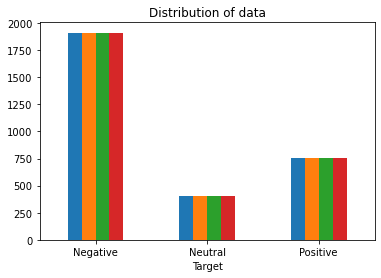

In [20]:
# Plotting the distribution for dataset.
ax = df.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Tweet']), list(df['Target'])

<AxesSubplot:xlabel='Target', ylabel='count'>

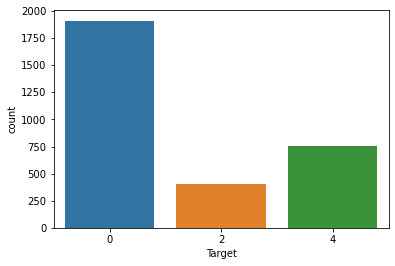

In [21]:
import seaborn as sns
sns.countplot(x='Target', data=df)

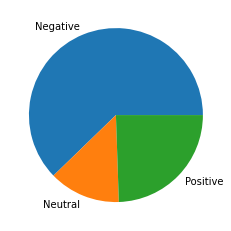

In [30]:
#we can add explode parameter to pop out the different sections of our pie chart
#remove explode parameter for a normal pie chart

ax = df.groupby('Target').count()
plt.pie(ax['Index'], labels = ['Negative', 'Neutral', 'Positive'])
plt.show()